# Exercise 47

# Imbalanced Data

In [2]:
from imblearn.datasets import fetch_datasets
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm

Using TensorFlow backend.


In [3]:
mammography=fetch_datasets()['mammography']

In [4]:
pd.DataFrame(mammography['target'])[0].value_counts()

-1    10923
 1      260
Name: 0, dtype: int64

In [5]:
X_train, X_test, y_train, y_test = train_test_split(mammography['data'],mammography['target'],test_size=0.20, random_state=123, stratify=mammography['target'])

In [6]:
pd.DataFrame(y_train)[0].value_counts()

-1    8738
 1     208
Name: 0, dtype: int64

In [7]:
pd.DataFrame(y_test)[0].value_counts()

-1    2185
 1      52
Name: 0, dtype: int64

In [8]:
clf_random = RandomForestClassifier(n_estimators=20, max_depth=None,
     min_samples_split=7, random_state=0)

In [9]:
clf_random.fit(X_train,y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [10]:
y_pred=clf_random.predict(X_test)


In [11]:
target_names = ['Benign', 'Malignant']
print(classification_report(y_test, y_pred,target_names=target_names))
              

              precision    recall  f1-score   support

      Benign       0.99      1.00      0.99      2185
   Malignant       0.81      0.48      0.60        52

    accuracy                           0.99      2237
   macro avg       0.90      0.74      0.80      2237
weighted avg       0.98      0.99      0.98      2237



In [12]:
cm = confusion_matrix(y_test, y_pred) 

cm_df = pd.DataFrame(cm,
                     index = ['Benign', 'Malignant'], 
                     columns = ['Benign', 'Malignant'])


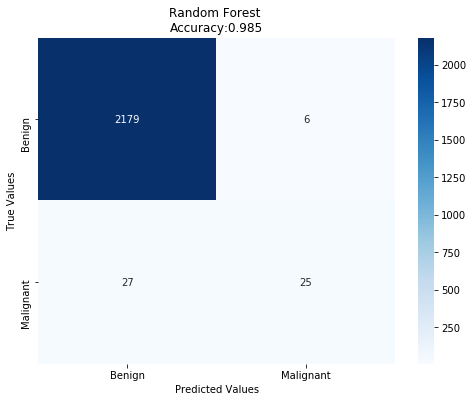

In [13]:
plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True,fmt='g',cmap='Blues')
plt.title('Random Forest \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_pred)))
plt.ylabel('True Values')
plt.xlabel('Predicted Values')
plt.show()

In [14]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from collections import Counter
import numpy as np

In [15]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

# Exercise 48

# Visualizing  Sampling Techniques

## Original Data

In [16]:
X=mammography['data'][:,[0,1]]
y=mammography['target']


In [17]:
print(sorted(Counter(y).items()))

[(-1, 10923), (1, 260)]


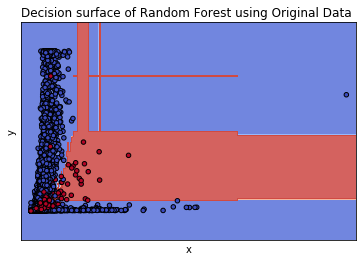

In [18]:
clf = clf_random.fit(X,y)

fig, ax = plt.subplots()
# title for the plots
title = ('Decision surface of Random Forest using Original Data ')
# Set-up grid for plotting.
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('y')
ax.set_xlabel('x')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
plt.show()

## Under Sample

In [19]:
rus = RandomUnderSampler(random_state=0)
X_resampled, y_resampled = rus.fit_resample(mammography['data'],mammography['target'])

In [20]:
print(sorted(Counter(y_resampled).items()))

[(-1, 260), (1, 260)]


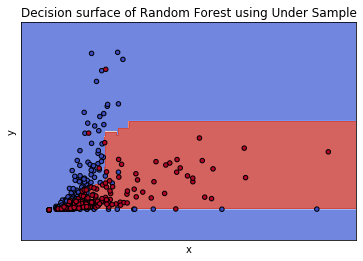

In [21]:
X=X_resampled[:,[0,1]]
y=y_resampled

clf = clf_random.fit(X,y)

fig, ax = plt.subplots()
# title for the plots
title = ('Decision surface of Random Forest using Under Sample')
# Set-up grid for plotting.
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('y')
ax.set_xlabel('x')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
plt.show()

## Over Sample

In [22]:
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(mammography['data'],mammography['target'])

In [23]:
print(sorted(Counter(y_resampled).items()))

[(-1, 10923), (1, 10923)]


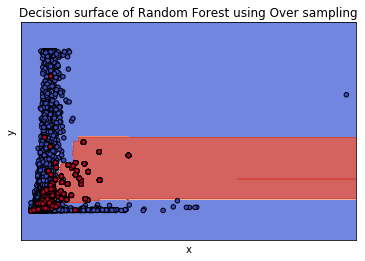

In [24]:
X=X_resampled[:,[0,1]]
y=y_resampled

clf = clf_random.fit(X,y)

fig, ax = plt.subplots()
# title for the plots
title = ('Decision surface of Random Forest using Over sampling')
# Set-up grid for plotting.
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('y')
ax.set_xlabel('x')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
#ax.legend()
plt.show()

## SMOTE

In [25]:
X_resampled, y_resampled = SMOTE().fit_resample(mammography['data'],mammography['target'])

In [26]:
print(sorted(Counter(y_resampled).items()))

[(-1, 10923), (1, 10923)]


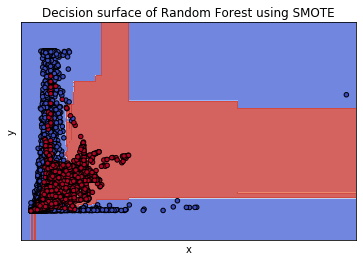

In [27]:
X=X_resampled[:,[0,1]]
y=y_resampled

clf = clf_random.fit(X,y)

fig, ax = plt.subplots()
# title for the plots
title = ('Decision surface of Random Forest using SMOTE')
# Set-up grid for plotting.
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('y')
ax.set_xlabel('x')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
#ax.legend()
plt.show()


## Fitting a Random Forest Classifier using SMOTE and Building the Confusion Matrix

In [28]:
X_resampled, y_resampled = SMOTE().fit_resample(X_train,y_train)

In [29]:
clf_random.fit(X_resampled,y_resampled)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [30]:
y_pred=clf_random.predict(X_test)

In [31]:
target_names = ['Benign', 'Malignant']
print(classification_report(y_test, y_pred,target_names=target_names))

              precision    recall  f1-score   support

      Benign       0.99      0.98      0.99      2185
   Malignant       0.50      0.71      0.59        52

    accuracy                           0.98      2237
   macro avg       0.75      0.85      0.79      2237
weighted avg       0.98      0.98      0.98      2237



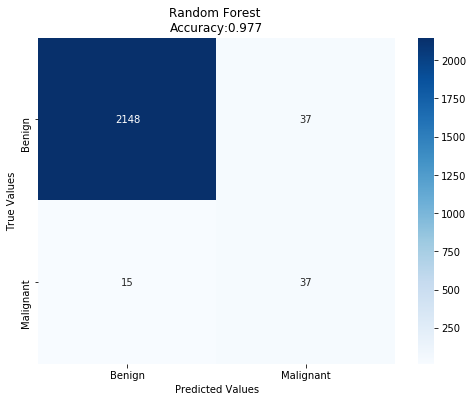

In [32]:
cm = confusion_matrix(y_test, y_pred) 

cm_df = pd.DataFrame(cm,
                     index = ['Benign', 'Malignant'], 
                     columns = ['Benign', 'Malignant'])
plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True,fmt='g',cmap='Blues')
plt.title('Random Forest \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_pred)))
plt.ylabel('True Values')
plt.xlabel('Predicted Values')
plt.show()